# Welcome to Lab 9: Dynamic Programming 1

In this lab, we will see how dynamic programming can speed up our algorithms and possibly reduce their complexity.

Throughout the exercise, you will be extending the classes by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercises, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables).
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the `customMagic.py` nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOU STUDENT NUMBER
student = 3893995

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

In [2]:
from custommagics import CustomMagics
import timeit

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

get_ipython().register_magics(CustomMagics)

In [3]:
%%execwritefile exercise9_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt

RNG = np.random.default_rng()

Writing exercise9_3893995_notebook.py


In [4]:
plt.matplotlib.rcParams['figure.figsize'] = [30, 10]

# 1.0 Fibonacci Sequence

The Fibonacci sequence is a well-known example of dynamic programming, with the basic idea that each number only depends on the previous two numbers and never changes. Try, to find a recurrence relation for the Fibonacci sequence before you continue reading. Does using dynamic programming change the complexity of calculating the Fibonacci sequence?

In this exercise, we will implement the sequence in three ways and later will measure the performances. First, we will implement a basic Fibonacci sequence without dynamic programming. Second, we will use bottom-up dynamic programming. Lastly, we will use top-down dynamic programming to calculate a Fibonacci number. 

Implement `recursive_fibo` below. If you forgot how the Fibonacci sequence works here is a [link](https://en.wikipedia.org/wiki/Fibonacci_sequence) to the wiki.

In [5]:
%%execwritefile exercise9_{student}_notebook.py 100 -a -s

def recursive_fibo(n):
    """
    This function calculates the nth Fibonacci sequence number.

    Note, that in this lab we will define the Fibonacci sequence as follows:
    $fibo(0) = 0$ and $fibo(1) = 1$
    """
    if n == 0:
        return 0
    if n == 1:
        return 1
    return recursive_fibo(n-1) + recursive_fibo(n-2)
    

Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your `recursive_fibo` function.

In [6]:
# Type your testing code here
print(recursive_fibo(10))

55


## 1.1 Fibonacci Sequence Bottom-Up Dynamic Programming

Bottom-up dynamic programming means that you start with the smallest value and build larger numbers. In the case of the Fibonacci sequence, you start with $fibo(0) = 0$ and $fibo(1) = 1$. Now, we need something to save all Fibonacci numbers therefore we use a class. Note, that we could even store the numbers in a class attribute instead of an object attribute, however, this would mean that you have to restart the notebook to get a clean test results. Therefore, we will use object attributes.

In [7]:
%%execwritefile exercise9_{student}_notebook.py 110 -a -s

class FibonacciBottomUp():
    """
    This class has one object attribute:
        :param fibo_numbers: A dictionary with the Fibonacci number, where the dictionary works like this: fibo(key) = value
        :type fibo_numbers: dict[int, int]
    """
    def __init__(self):
        """
        Here the Fibonacci numbers are initialized for the function because they are always the same.
        """
        self.fibo_numbers = {0: 0, 1: 1}

    def __call__(self, n):
        """
        This method calculates the nth Fibonacci number using bottom-up dynamic programming.

        :param n: The nth Fibonacci number
        :type n: int
        :return: fibo(n)
        :rtype: int
        """
        self.step(n)
        return self.result
        
    def step(self, n):
        """
        This calculates recursively the nth Fibonacci number.
        
        :param n: The nth Fibonacci number
        :type n: int
        :return: fibo(n)
        :rtype: int
        """
        if n <= 1:
            self.result = n
        else:
            fib = [0, 1]
            for i in range(2, n + 1):
                fib.append(fib[-1] + fib[-2])
            self.result = fib[-1]



Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your `FibonacciBottomUp` class.

In [8]:
# Type your testing code here
fibo = FibonacciBottomUp()

## 1.2 Fibonacci Sequence Top-Down Dynamic Programming

Top-down dynamic programming means that you start with the value you want to know and then calculate which numbers you need to be able to calculate it. In the case of the Fibonacci sequence, you start with the $n$ that you want to know and then calculate all the smaller numbers. Note, that instead of a base case, you can fill the fibonacci numbers with $fibo(0) = 0$ and $fibo(1) = 1$. 

Hint: Only the main loop in call is different between top-down and bottom-up

In [9]:
%%execwritefile exercise9_{student}_notebook.py 120 -a -s

class FibonacciTopDown(FibonacciBottomUp):
    def __call__(self, n):
        """
        This method calculates the nth Fibonacci number using top-down dynamic programming.

        :param n: The nth Fibonacci number
        :type n: int
        :return: fibo(n)
        :rtype: int
        """
        if n in self.fibo_numbers:
            return self.fibo_numbers[n]
        
        self.fibo_numbers[n] = self(n-1) + self(n-2)
        return self.fibo_numbers[n]

Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your `FibonacciTopDown` class.

In [10]:
# Type your testing code here
fibo = FibonacciTopDown()

## 1.3 Fibonacci Sequence Non-Recursive Dynamic Programming

So far, we have seen both algorithms implemented using recursion, however, you can also use a bottom-up approach using an iterative algorithm, where you fill in the table (from the theory) that you use for the recurrence equation.

Below, we will implement such an approach. Start by making an array that represents the table and then use a bottom-up approach to fill the table.


In [11]:
%%execwritefile exercise9_{student}_notebook.py 130 -a -s

def fibonacci(max_):
    """
    The maximum Fibonacci number you want to calculate.

    Note that if max_ = 5 then fibo(max_) = fibo(5) = 5, in other words, max_ is the nth index starting from 0.

    :param max_: The maximum Fibonacci number you want to calculate, this includes max_.
    :type max_: int
    :return: The table with all Fibonacci numbers till `max_`
    :rtype: ndarray[int, (max_)]
    """
    fibo = np.zeros(max_+1, dtype=int)
    fibo[1] = 1
    for i in range(2, max_+1):
        fibo[i] = fibo[i-1] + fibo[i-2]
    return fibo

Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your `fibonacci` function.

In [12]:
# Type your testing code here
print(fibonacci(10))

[ 0  1  1  2  3  5  8 13 21 34 55]


## 1.4 Factorial

Let's test a different sequence before we start testing the different implementations for the Fibonacci sequence. Here, we will implement the factorial sequence. Again create the recurrence relation for the factorial sequence. This sequence consists of all factorial numbers starting with 0! then 1!, 2!, 3!, etc.. Does the complexity of the algorithm to calculate this sequence also change using dynamic programming?

Below, implement a recursive function to calculate the nth factorial number.


In [13]:
%%execwritefile exercise9_{student}_notebook.py 140 -a -s

def recursive_fact(n):
    """
    This function calculates the nth factorial number.

    Note, that $fact(0) = 1$ and $fact(1) = 1$
    """
    if n == 0:
        return 1
    if n == 1:
        return 1
    return n * recursive_fact(n-1)


Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your `recursive_fact` function.

In [14]:
# Type your testing code here

print(recursive_fact(5))

120


## 1.5 Factorial Top-Down Dynamic Programming

Below, implement a top-down dynamic programming algorithm to calculate the nth factorial number. 

In [15]:
%%execwritefile exercise9_{student}_notebook.py 150 -a -s

class Factorial():
    """
    This class has one object attribute:
        :param fact_numbers: A dictionary with the Factorial numbers, where the dictionary works like this: fact(key) = value
        :type fact_numbers: dict[int, int]
    """
    def __init__(self):
        """
        Here the Factorial numbers are initialized for the function because they are always the same.
        """
        self.fact_numbers = {0: 1}

    def __call__(self, n):
        """
        This method calculates the nth Factorial number using top-down dynamic programming.

        :param n: The nth Fibonacci number
        :type n: int
        :return: fact(n)
        :rtype: int
        """
        if n in self.fact_numbers:
            return self.fact_numbers[n]
        
        self.fact_numbers[n] = n * self(n-1)
        return self.fact_numbers[n]
            
    def step(self, n):
        """
        This calculates recursively the nth Factorial number.
        
        :param n: The nth Fibonacci number
        :type n: int
        :return: fact(n)
        :rtype: int
        """
        return self(n)


Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your `FibonacciBottomUp` function.

In [16]:
# Type your testing code here
fact = Factorial()

## 1.6 One-Time Performance Tests

Below you can see how long it takes for each algorithm to calculate a certain number in the sequences. Check if your expectations about the complexity match with the results. 

Note, that in these tests only one number is calculated. Would the results be different if we calculate multiple numbers?

In [17]:
fibo_number = 35
factorial_number = 1000

print("Starting measuring performance ...")
print(f"Calculating the {fibo_number}th fibonacci number, using the basic recursive implementation for the fibonacci sequence, took:\t\t\t",
      format(timeit.timeit(f"recursive_fibo({fibo_number})",
                    setup="from __main__ import recursive_fibo",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the {fibo_number}th fibonacci number, using the bottom-up dynamic programming for the fibonacci sequence, took:\t\t\t",
      format(timeit.timeit(f"FibonacciBottomUp()({fibo_number})",
                    setup="from __main__ import FibonacciBottomUp",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the {fibo_number}th fibonacci number, using the top-down dynamic programming for the fibonacci sequence, took:\t\t\t\t",
      format(timeit.timeit(f"FibonacciTopDown()({fibo_number})",
                    setup="from __main__ import FibonacciTopDown",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the {fibo_number}th fibonacci number, using the bottom-up dynamic programming (non-recursive) for the fibonacci sequence, took:\t",
      format(timeit.timeit(f"fibonacci({fibo_number})",
                    setup="from __main__ import fibonacci",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the {factorial_number}th factorial number, using the basic recursive implementation for the factorial sequence, took:\t\t\t",
      format(timeit.timeit(f"recursive_fact({factorial_number})",
                    setup="from __main__ import recursive_fact",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the {factorial_number}th factorial number, using the top-down dynamic programming for the factorial sequence, took:\t\t\t",
      format(timeit.timeit(f"Factorial()({factorial_number})",
                    setup="from __main__ import Factorial",
                    number=1), ".6f"),
      "seconds")

Starting measuring performance ...
Calculating the 35th fibonacci number, using the basic recursive implementation for the fibonacci sequence, took:			 3.873306 seconds
Calculating the 35th fibonacci number, using the bottom-up dynamic programming for the fibonacci sequence, took:			 0.000026 seconds
Calculating the 35th fibonacci number, using the top-down dynamic programming for the fibonacci sequence, took:				 0.000035 seconds
Calculating the 35th fibonacci number, using the bottom-up dynamic programming (non-recursive) for the fibonacci sequence, took:	 0.000026 seconds
Calculating the 1000th factorial number, using the basic recursive implementation for the factorial sequence, took:			 0.000808 seconds
Calculating the 1000th factorial number, using the top-down dynamic programming for the factorial sequence, took:			 0.001013 seconds


## 1.7 Several Calculations Performance Tests

Below, you can see the results of the performance test if we want to calculate multiple number using the algorithms in this exercise.

In [18]:
fibo_number = 35
factorial_number = 1000

print("Starting measuring performance ...")
print(f"Calculating the first {fibo_number}th fibonacci numbers, using the basic recursive implementation for the fibonacci sequence, took:\t\t\t",
      format(timeit.timeit(f"[recursive_fibo(i) for i in range(2, {fibo_number})]",
                    setup="from __main__ import recursive_fibo",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the first {fibo_number}th fibonacci numbers, using the bottom-up dynamic programming for the fibonacci sequence, took:\t\t\t\t",
      format(timeit.timeit(f"f = FibonacciBottomUp()\n[f(i) for i in range(2, {fibo_number})]",
                    setup="from __main__ import FibonacciBottomUp",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the first {fibo_number}th fibonacci numbers, using the top-down dynamic programming for the fibonacci sequence, took:\t\t\t\t",
      format(timeit.timeit(f"f = FibonacciTopDown()\n[f(i) for i in range(2, {fibo_number})]",
                    setup="from __main__ import FibonacciTopDown",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the first {fibo_number}th fibonacci numbers, using the bottom-up dynamic programming (non-recursive) for the fibonacci sequence, took:\t\t",
      format(timeit.timeit(f"[fibonacci(i) for i in range(2, {fibo_number})]",
                    setup="from __main__ import fibonacci",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the first {factorial_number}th factorial numbers, using the basic recursive implementation for the factorial sequence, took:\t\t\t",
      format(timeit.timeit(f"[recursive_fact(i) for i in range({factorial_number})]",
                    setup="from __main__ import recursive_fact",
                    number=1), ".6f"),
      "seconds")
print(f"Calculating the first {factorial_number}th factorial numbers, using the top-down dynamic programming for the factorial sequence, took:\t\t\t",
      format(timeit.timeit(f"f = Factorial()\n[f(i) for i in range({factorial_number})]",
                    setup="from __main__ import Factorial",
                    number=1), ".6f"),
      "seconds")

Starting measuring performance ...
Calculating the first 35th fibonacci numbers, using the basic recursive implementation for the fibonacci sequence, took:			 5.161862 seconds
Calculating the first 35th fibonacci numbers, using the bottom-up dynamic programming for the fibonacci sequence, took:				 0.000080 seconds
Calculating the first 35th fibonacci numbers, using the top-down dynamic programming for the fibonacci sequence, took:				 0.000028 seconds
Calculating the first 35th fibonacci numbers, using the bottom-up dynamic programming (non-recursive) for the fibonacci sequence, took:		 0.000184 seconds
Calculating the first 1000th factorial numbers, using the basic recursive implementation for the factorial sequence, took:			 0.121769 seconds
Calculating the first 1000th factorial numbers, using the top-down dynamic programming for the factorial sequence, took:			 0.000631 seconds


# 2.0 Maximum Path Sum 

In this exercise, we will solve a more general version of one of the [euler project](https://projecteuler.net/problem=18) problems. In this problem, we have a triangle of numbers where paths exist from the top of the triangle to the bottom of the triangle. Your job is to find the path with the smallest sum. Below, you can see a screenshot of the example in the Euler problem.

<img src="path_sum.png" alt="drawing"/>

A good way to solve this problem is by using top-down dynamic programming. Think about what the recurrence relation is for this problem. We will generate a random triangle of numbers as a triangle object that contains the top node. Each Node then contains two other nodes that are the lower left and lower right node. Note, that this triangle object is not a binary tree but a graph as, from a tree datastructure point of view, parents share the same children. In the `Node` object, we will call it `left` and `right` referring to the lower left and lower right nodes.

Before, you start solving this problem check how the `Node` and `Triangle` classes work and implement a representation for the `Triangle` class. If you want you can skip this step but it is a good recursion problem to solve.

In [19]:
%%execwritefile exercise9_{student}_notebook.py 200 -a -s

class Node():
    def __init__(self, value, left=None, right=None):
        """
        This creates a node object containing the value and its lower right and left node.

        :param value: The value of the node
        :type value: int
        :param left: The lower left node, defaults to None
        :type left: Node
        :param right: The lower right
        :type right: Node        
        """
        self.value = value
        self.left = left
        self.right = right

    def __repr__(self):
        """
        This is the representation of the Node.
        You can adjust it to your own preference.
        """
        return f"Node({self.value})"

class Triangle():
    """
    This class has one object attribute:
        :param top: The top node of the triangle
        :type top: Node
    """
    
    def __init__(self, min_=1, max_=100, height=10):
        """
        This creates a random triangle object as explained above.

        :param min: The minimum value that can be generated as value for a node
        :type min: int
        :param max: The maximum value that can be generated as value for a node
        :type max: int
        :param depth: The height of the triangle.
        :type depth: int
        """
        # Initialize all nodes
        rows = []
        for row in range(1, height+1):
            rows.append([Node(RNG.integers(min_, max_)) for _ in range(row)])

        # Connect all nodes
        for i, row in enumerate(rows[:-1]):
            for j, cell in enumerate(row):
                cell.right = rows[i+1][j+1]
                cell.left  = rows[i+1][j]

        self.top = rows[0][0]
        self.height = height

    def __repr__(self):
        """
        The representation of a Triangle object.
        It might be useful to create a (static) helper method.
        This should look as follows (for the example given above):
        
        [3]
        [7, 4]
        [2, 4, 6]
        [8, 5, 9, 3]

        Thus, each row is represented as a list and each row ends with a new line.
        """
        def helper(node):
            if node is None:
                return ""
            return f"[{node.value}] {helper(node.left)}{helper(node.right)}\n"

        return helper(self.top)

    def show(self, path=None):
        """
        This method shows the current triangle.
        """
        graph = nx.Graph()

        pos = {}
        row = [self.top]
        for i in range(self.height):
            for j, node in enumerate(row):
                if node.left is not None:
                    graph.add_edge(node, node.left)
                    graph.add_edge(node, node.right)
                    
                graph.add_node(node)
                pos[node] = (j * 2 + (self.height-i), -i)
                
            row = [row[0].left] + [n.right for n in row]
            
        nx.draw_networkx(graph, 
                         pos,
                         labels = {node: node.value for node in pos},
                         node_color="w",
                         with_labels=True,
                         node_size=600,
                         width=1)
        
        if path is not None:
            edgelist = [(node, path[i+1]) for i, node in enumerate(path[:-1])]
            nx.draw_networkx_edges(graph, 
                                   pos, 
                                   edgelist,
                                   edge_color='r',
                                   width=4)
        plt.show()

Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your representation of the `Triangle` class.

[67] [63] [89] [99] [82] [23] [55] [30] [72] [46] 
[6] 

[98] [6] 
[91] 


[29] [98] [6] 
[91] 

[86] [91] 
[59] 



[60] [29] [98] [6] 
[91] 

[86] [91] 
[59] 


[46] [86] [91] 
[59] 

[75] [59] 
[4] 




[47] [60] [29] [98] [6] 
[91] 

[86] [91] 
[59] 


[46] [86] [91] 
[59] 

[75] [59] 
[4] 



[61] [46] [86] [91] 
[59] 

[75] [59] 
[4] 


[49] [75] [59] 
[4] 

[55] [4] 
[92] 





[67] [47] [60] [29] [98] [6] 
[91] 

[86] [91] 
[59] 


[46] [86] [91] 
[59] 

[75] [59] 
[4] 



[61] [46] [86] [91] 
[59] 

[75] [59] 
[4] 


[49] [75] [59] 
[4] 

[55] [4] 
[92] 




[42] [61] [46] [86] [91] 
[59] 

[75] [59] 
[4] 


[49] [75] [59] 
[4] 

[55] [4] 
[92] 



[67] [49] [75] [59] 
[4] 

[55] [4] 
[92] 


[49] [55] [4] 
[92] 

[78] [92] 
[34] 






[69] [67] [47] [60] [29] [98] [6] 
[91] 

[86] [91] 
[59] 


[46] [86] [91] 
[59] 

[75] [59] 
[4] 



[61] [46] [86] [91] 
[59] 

[75] [59] 
[4] 


[49] [75] [59] 
[4] 

[55] [4] 
[92] 




[42] [61] [46] [86] [91] 
[59] 

[75] [59] 
[4] 


[4

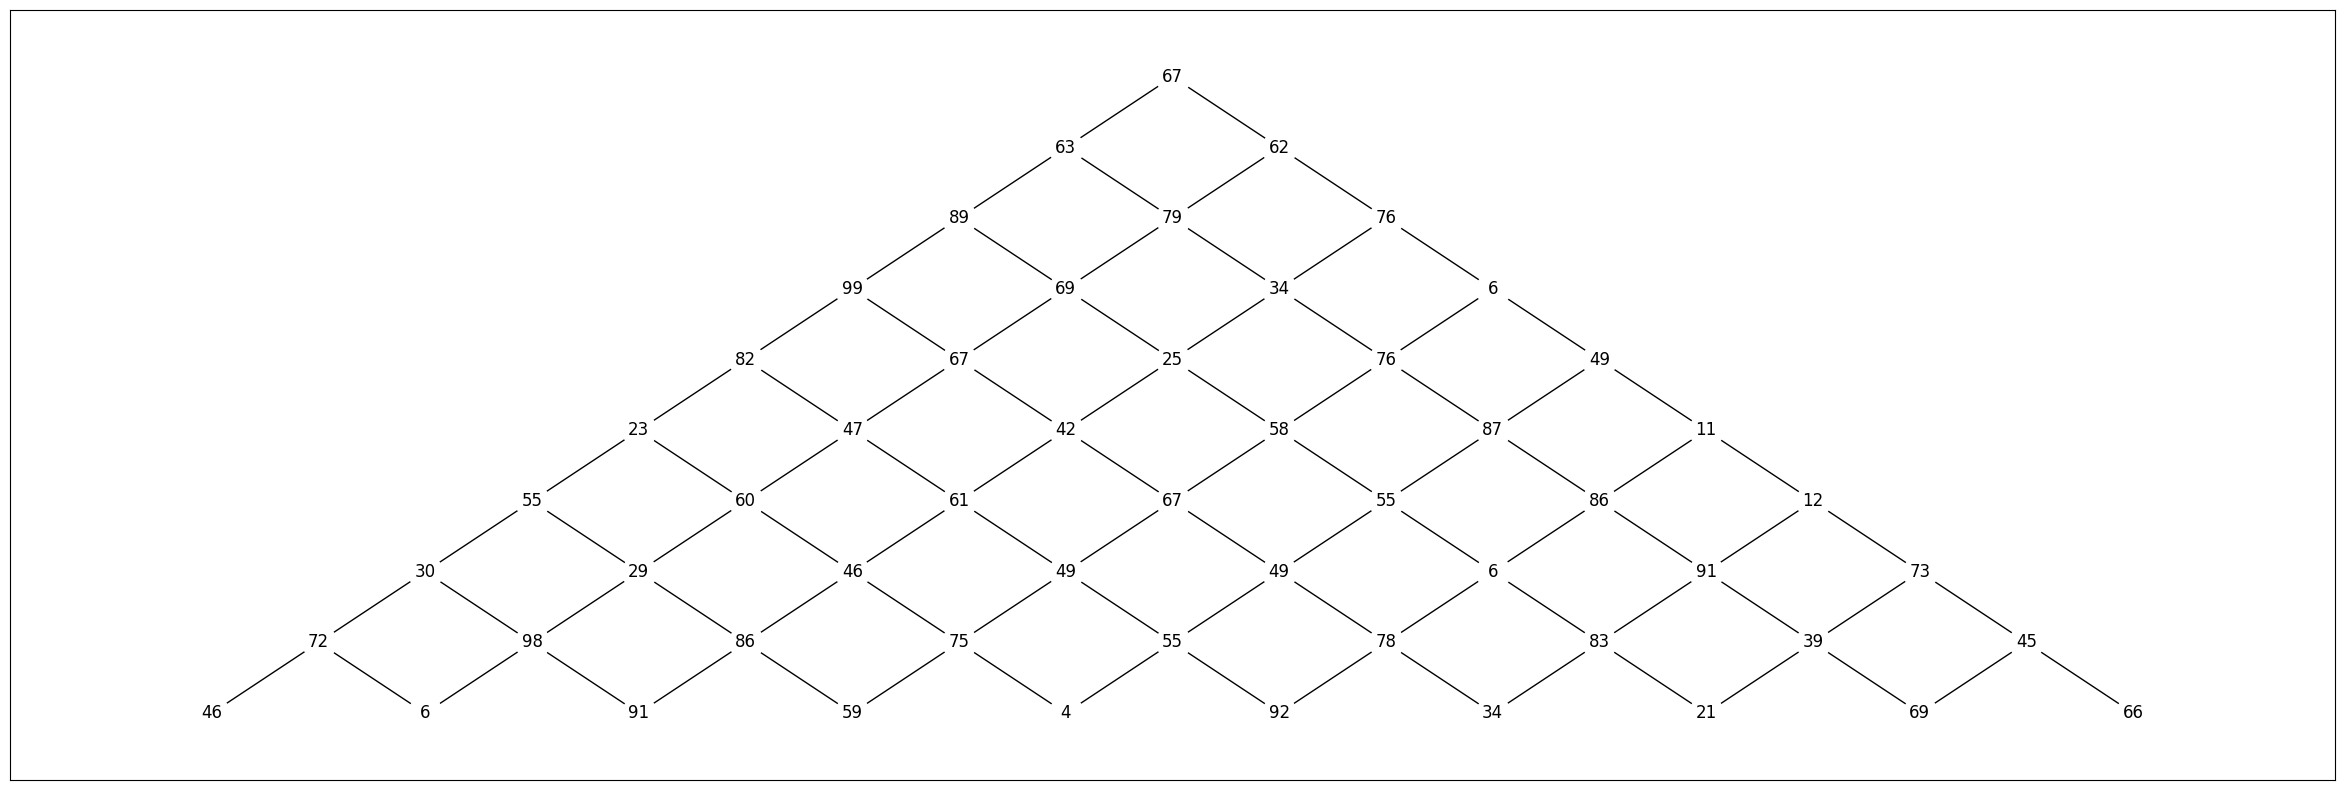

In [20]:
triangle = Triangle(height=10)
print(triangle)
triangle.show()

## 2.1 Maximum Path Sum 

Now, that we have a good visualization and representation of the `Triangle` solve the problem of finding the path with the maximum sum. This problem should be solved using Divide & Conquer and dynamic programming. Think about why you should use both techniques. How would the complexity change if you do not use dynamic programming?

Note, that for this problem we can not use a "static" memory because each problem is unique. Therefore, we need to reinialize the memory everytime we solve a triangle problem.

***Before, you start programming make a pseudocode for your approach.***

In [21]:
%%execwritefile exercise9_{student}_notebook.py 210 -a -s

class MaximumPathSum():
    """
    This class has the following object attributes when the object are called:
        :parem partial_path_sum: The dynamic programming memory, here the maximum sum and the corresponding path (next node) for each node are saved.
        :type partial_path_sum: dict[Node, tuple[Node, int]]
    """
    
    def __call__(self, triangle):
        """
        This method calculated the maximum sum path in the triangle.

        :param triangle: The triangle for which you need to calculate the maximum path sum
        :type triangle: Triangle
        :return: The sum of the path from the top node of the triangle and the path that gives this sum
        :rtype: int, list[Node]
        """
        self.partial_path_sum = {}
        max_sum = self.step(triangle.top)
        path = self.find_path(triangle.top)
        return max_sum, path

    def step(self, node):
        """
        One divide and conquer step to calculate the maximum path sum

        :param node: The current node
        :type node: Node
        :return: The sum of the path from this node
        :rtype: int
        """
        if node is None:
            return 0
        if node in self.partial_path_sum:
            return self.partial_path_sum[node][1]

        left_sum = self.step(node.left)
        right_sum = self.step(node.right)
        max_child_sum = max(left_sum, right_sum)
        total_sum = node.value + max_child_sum
        self.partial_path_sum[node] = (None, total_sum)

        return total_sum

    def find_path(self, node):
        """
        Find the path with the highest sum.

        :param node: The starting node of the path, top of the triangle
        :type node: Node
        :return: The path that gives the largest sum
        :rtype: list[Node]
        """
        path = []
        while node is not None:
            path.append(node)
            node = self.partial_path_sum[node][0]
        return path[::-1]


Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your code for the `MaximumPathSum` class.

The maximum value in the triangle is 1451 consisting of the values: [Node(67)]


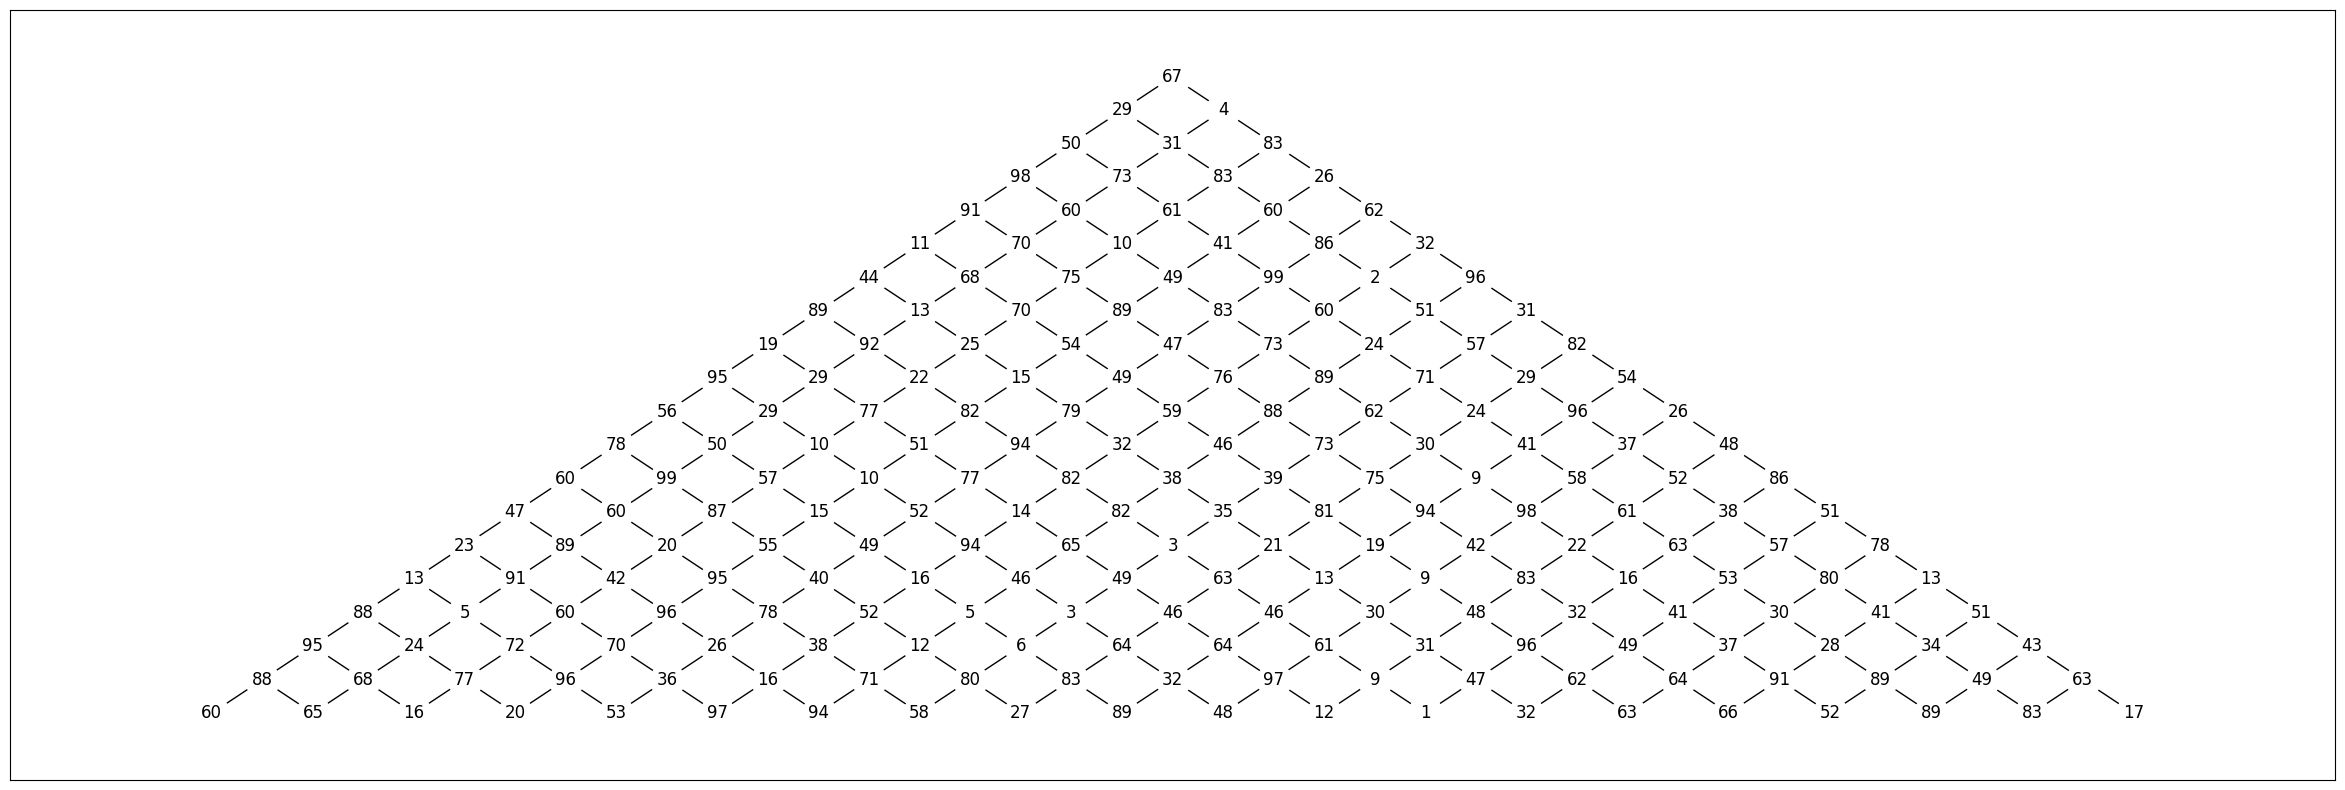

In [22]:
triangle = Triangle(height=20)
value, path = MaximumPathSum()(triangle)
print(f"The maximum value in the triangle is {value} consisting of the values: {path}")
triangle.show(path)

# 3.0 Calculating Prime Numbers

In this exercise, we will efficiently calculate prime numbers using bottom-up dynamic programming. A number is a prime number if it is only divisible by itself or 1. Therefore, we can use three facts to check if a number is prime:
 - If a number is not divisible by any other prime number then it is also not divisible by all other numbers. Reason: All non-prime numbers consist of a multiplication of prime numbers. So, if a number would be divisible by a non-prime number it would also be divisible by a prime number.
 - If we checked all numbers up to the square root of the number and none of the numbers are a proper divisor then we know that the number is a prime number. Reason: All numbers larger than the square root of the number have an outcome lower than the square root of the number and we already checked those.
 - A proper divisor of a number is a positive whole number excluding zero and one.

***Now, think of an algorithm that uses these facts to create an effective bottom-up dynamic programming approach for calculating prime numbers***

In [23]:
%%execwritefile exercise9_{student}_notebook.py 300 -a -s

class Primes():
    """
    This class has the following object attributes:
        :param primes: The list of prime numbers.
        :type primes: list[int]
    """
    def __init__(self):
        """
        Prime numbers do not change. So, we can use the same "memory" every time we run the callable object we initiate here.
        """
        self.primes = [2, 3]

    def __call__(self, max_):
        """
        Calculate all prime numbers up to the `max_` number

        :param max_: The largest number to check if it is prime.
        :param max_: int
        """
        for i in range(self.primes[-1]+2, max_+1, 2):
            is_prime = True
            for prime in self.primes:
                if i % prime == 0:
                    is_prime = False
                    break
            if is_prime:
                self.primes.append(i)
        return self.primes
                
    def __repr__(self):
        """
        Representation of the class objects, you can change it however you like.
        """
        return str(self.primes)

Appending to exercise9_3893995_notebook.py


## Test your code

In the cell below, you can test your code for the `Primes` class.

In [24]:
# Test your code here

primes = Primes()
print(primes(100))


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


# 4.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise9_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise9_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise9_{student}.py"**. Now, you can adjust the **"exercise9_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.

***NOTE, that you can now also upload the exercises from week 1! The process is exactly the same only there is no unittest.***